<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
import requests
import pandas as pd
from bs4 import BeautifulSoup

Download the webpage at the url


In [4]:
#your code goes here
r=requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup=BeautifulSoup(r,'html.parser')

Scrape the `Language name` and `annual average salary`.


In [32]:
#your code goes here
table=soup.find('table')
data=[]
for row in table.find_all('tr'):
    col= row.find_all('td')
    language_name=col[1].text
    average_annual_salary=col[3].text
    data.append({'Language Name':language_name, 'Average Annual Salary':average_annual_salary})


Save the scrapped data into a file named *popular-languages.csv*


Data saved to csv


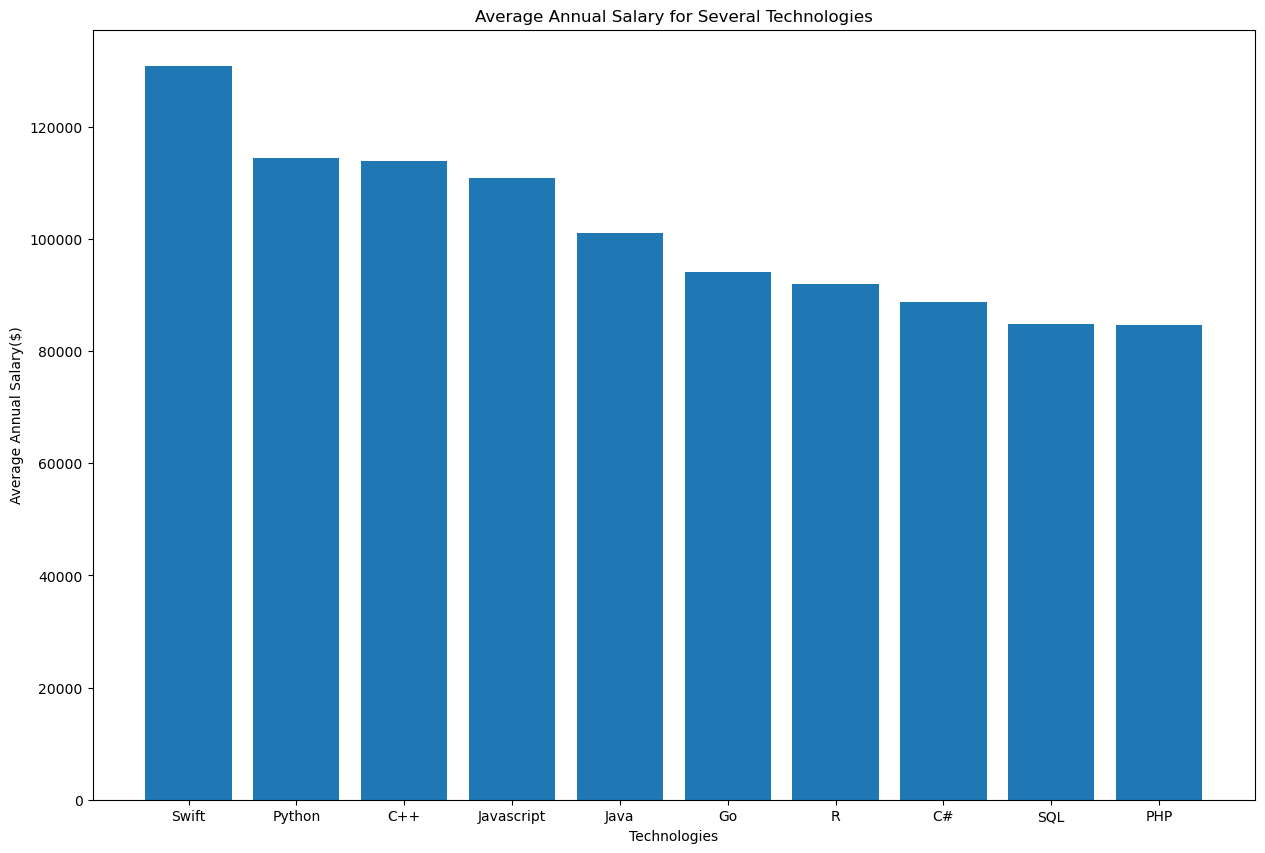

In [33]:
# your code goes here
df=pd.DataFrame(data)
df.to_csv('popular-languages.csv', index=False)
df=df.drop(0)
df['Average Annual Salary'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)
df_sorted = df.sort_values(by='Average Annual Salary', ascending=False)
print('Data saved to csv')
df_sorted
#import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(df_sorted['Language Name'],df_sorted['Average Annual Salary'])
plt.title('Average Annual Salary for Several Technologies')
plt.xlabel('Technologies')
plt.ylabel('Average Annual Salary($)')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
